<center> <h2>Detecção de ataques DDoS no tráfego da IoT utilizando métodos <br><i>ensemble</i> para classificação de fluxos contínuos de dados</h2> </center>

<center>Kétly Gonçalves Machado (<a href=mailto:ketly@ime.usp.br>ketly@ime.usp.br</a>) e Daniel Macêdo Batista (<a href=mailto:batista@ime.usp.br>batista@ime.usp.br</a>)</center>

<center><a href=https://www.ime.usp.br/dcc/>Departamento de Ciência da Computação</a></center>

<center>Universidade de São Paulo</center>

<center>São Paulo, Brasil</center>

***

### Dataset BoT-IoT

<div style="text-align: justify">
    O conjunto de dados <a href="https://research.unsw.edu.au/projects/bot-iot-dataset">BoT-IoT</a> foi utilizado nesta pesquisa para realização da análise de métodos <i>ensemble</i> para classificação de fluxos contínuos de dados. Este conjunto de dados foi publicado em 2018 pelo laboratório Cyber Range da universidade UNSW Canberra e apresenta tráfego de rede realístico da Internet das Coisas (IoT), incorporando uma combinação de instâncias normais e instâncias de ataque.<br><br>
    O <i>testbed</i> utilizado para construção do conjunto de dados é composto por três componentes:
    <ul>
        <li> Plataformas de rede, que incluem máquinas virtuais normais e atacantes, um servidor Ubuntu, Ubuntu <i>mobile</i>, Windows 7, Metasploitable (uma máquina virtual Ubuntu intencionalmente vulnerável) e uma máquina Ubuntu TAP (<i>Test Access Point</i>)
        <li> Serviços da IoT simulados, implementados no servidor Ubuntu, que reproduzem uma estação metereológica, um refrigerador inteligente, luzes ativadas por movimento, uma porta de garagem ativada remotamente e um termostato inteligente
        <ul>
            <li>Para simular o comportamento de rede dos dispositivos, os autores utilizaram a ferramenta <a href="https://nodered.org/">Node-red</a></li>
            <li>Os cinco cenários foram conectados ao servidor Ubuntu (onde um <i>broker</i> <a href="https://mosquitto.org/">Mosquitto MQTT</a> foi instalado) e também ao serviço <a href="https://aws.amazon.com/iot/">AWS IoT hub</a></li>
        </ul>
        <li>Extração de <i>features</i> e análise forense, onde a ferramenta <a href="https://openargus.org/">Argus</a> foi utilizada para extração das <i>features</i> dos dados e, além disso, onde modelos estatísticos e técnicas de <i>machine learning</i> foram empregadas para separação das instâncias entre tráfego normal e tráfego de ataque</li>
    </ul>
    Os arquivos originais do conjunto de dados incluem os formatos PCAP, argus e CSV. Os arquivos PCAP capturados totalizam 69,4 GB, com mais de 72 milhões de registros. O fluxo de tráfego extraído, em formato CSV, possui 17,4 GB, incluindo ataques dos tipos <i>Service Scanning</i>, OS <i>Firgerprint</i>, DDoS, DoS, <i>Keylogging</i> e <i>Data Theft</i>, sendo que os ataques DDoS e DoS também estão divididos por protocolo.
</div>

<div style="text-align: justify">
    O conjunto de dados original possui um total de 35 <i>features</i>, detalhadas na tabela abaixo. A <i>feature</i> <b>attack</b> é o rótulo da classe, que divide as instâncias entre tráfego normal e tráfego de ataque.
</div>

<div style="width: 100%;">
    <div style="width: 49%;float: left;">
        <table style="width: 100%;border: 0px solid black;">
            <colgroup>
               <col span="1" style="width: 5%;">
               <col span="1" style="width: 15%;">
               <col span="1" style="width: 80%;">
            </colgroup>
            <thead style="border: 0px;">
                <tr>
                    <th style="text-align:center;background-color: #21adc0; color: white;">#</th>
                    <th style="text-align:center;background-color: #21adc0; color: white;">Feature</th>
                    <th style="text-align:center;background-color: #21adc0; color: white;">Descrição</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">1</td>
                    <td style="text-align:center;background-color: #ebfcff">pkSeqID</td>
                    <td style="text-align:center;background-color: #ebfcff">Identificador da linha</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">2</td>
                    <td style="text-align:center;background-color: #b9ecf3">stime</td>
                    <td style="text-align:center;background-color: #b9ecf3">Tempo inicial do registro</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">3</td>
                    <td style="text-align:center;background-color: #ebfcff">flgs</td>
                    <td style="text-align:center;background-color: #ebfcff"><i>Flags</i> de estado do fluxo vistas nas transações</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">4</td>
                    <td style="text-align:center;background-color: #b9ecf3">proto</td>
                    <td style="text-align:center;background-color: #b9ecf3">Representação textual dos protocolos presentes no fluxo de rede</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">5</td>
                    <td style="text-align:center;background-color: #ebfcff">saddr</td>
                    <td style="text-align:center;background-color: #ebfcff">Endereço IP de origem</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">6</td>
                    <td style="text-align:center;background-color: #b9ecf3">sport</td>
                    <td style="text-align:center;background-color: #b9ecf3">Número da porta de origem</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">7</td>
                    <td style="text-align:center;background-color: #ebfcff">daddr</td>
                    <td style="text-align:center;background-color: #ebfcff">Endereço IP de destino</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">8</td>
                    <td style="text-align:center;background-color: #b9ecf3">dport</td>
                    <td style="text-align:center;background-color: #b9ecf3">Número da porta de destino</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">9</td>
                    <td style="text-align:center;background-color: #ebfcff">pkts</td>
                    <td style="text-align:center;background-color: #ebfcff">Contagem total de pacotes em transação</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">10</td>
                    <td style="text-align:center;background-color: #b9ecf3">bytes</td>
                    <td style="text-align:center;background-color: #b9ecf3">Número total de bytes em transação</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">11</td>
                    <td style="text-align:center;background-color: #ebfcff">state</td>
                    <td style="text-align:center;background-color: #ebfcff">Estado da transação</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">12</td>
                    <td style="text-align:center;background-color: #b9ecf3">ltime</td>
                    <td style="text-align:center;background-color: #b9ecf3">Último tempo do registro</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">13</td>
                    <td style="text-align:center;background-color: #ebfcff">seq</td>
                    <td style="text-align:center;background-color: #ebfcff">Número sequencial da ferramenta Argus</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">14</td>
                    <td style="text-align:center;background-color: #b9ecf3">dur</td>
                    <td style="text-align:center;background-color: #b9ecf3">Duração total do registro</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">15</td>
                    <td style="text-align:center;background-color: #ebfcff">mean</td>
                    <td style="text-align:center;background-color: #ebfcff">Duração média dos registros agregados</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">16</td>
                    <td style="text-align:center;background-color: #b9ecf3">stddev</td>
                    <td style="text-align:center;background-color: #b9ecf3">Desvio padrão dos registros agregados</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">17</td>
                    <td style="text-align:center;background-color: #ebfcff">smac</td>
                    <td style="text-align:center;background-color: #ebfcff">-</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">18</td>
                    <td style="text-align:center;background-color: #b9ecf3">dmac</td>
                    <td style="text-align:center;background-color: #b9ecf3">-</td>
                </tr>
            </tbody>
        </table>
    </div>
    <div style="width: 49%;float: left;margin-left: 2%;">
        <table style="width: 100%;border: 0px solid black;">
            <colgroup>
               <col span="1" style="width: 5%;">
               <col span="1" style="width: 15%;">
               <col span="1" style="width: 80%;">
            </colgroup>
            <thead style="border: 0px;">
                <tr>
                    <th style="text-align:center;background-color: #21adc0; color: white;">#</th>
                    <th style="text-align:center;background-color: #21adc0; color: white;">Feature</th>
                    <th style="text-align:center;background-color: #21adc0; color: white;">Descrição</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">19</td>
                    <td style="text-align:center;background-color: #ebfcff">sum</td>
                    <td style="text-align:center;background-color: #ebfcff">Duração total dos registros agregados</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">20</td>
                    <td style="text-align:center;background-color: #b9ecf3">min</td>
                    <td style="text-align:center;background-color: #b9ecf3">Duração mínima dos registros agregados</td>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">21</td>
                    <td style="text-align:center;background-color: #ebfcff">max</td>
                    <td style="text-align:center;background-color: #ebfcff">Duração máxima dos registros agregados</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">22</td>
                    <td style="text-align:center;background-color: #b9ecf3">soui</td>
                    <td style="text-align:center;background-color: #b9ecf3">-</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">23</td>
                    <td style="text-align:center;background-color: #ebfcff">doui</td>
                    <td style="text-align:center;background-color: #ebfcff">-</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">24</td>
                    <td style="text-align:center;background-color: #b9ecf3">sco</td>
                    <td style="text-align:center;background-color: #b9ecf3">-</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">25</td>
                    <td style="text-align:center;background-color: #ebfcff">dco</td>
                    <td style="text-align:center;background-color: #ebfcff">-</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">26</td>
                    <td style="text-align:center;background-color: #b9ecf3">spkts</td>
                    <td style="text-align:center;background-color: #b9ecf3">Contagem de pacotes da origem para o destino</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">27</td>
                    <td style="text-align:center;background-color: #ebfcff">dpkts</td>
                    <td style="text-align:center;background-color: #ebfcff">Contagem de pacotes do destino para a origem</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">28</td>
                    <td style="text-align:center;background-color: #b9ecf3">sbytes</td>
                    <td style="text-align:center;background-color: #b9ecf3">Contagem de bytes da origem para o destino</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">29</td>
                    <td style="text-align:center;background-color: #ebfcff">dbytes</td>
                    <td style="text-align:center;background-color: #ebfcff">Contagem de bytes do destino para a origem</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">30</td>
                    <td style="text-align:center;background-color: #b9ecf3">rate</td>
                    <td style="text-align:center;background-color: #b9ecf3">Total de pacotes por segundo em transação</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">31</td>
                    <td style="text-align:center;background-color: #ebfcff">srate</td>
                    <td style="text-align:center;background-color: #ebfcff">Contagem de pacotes por segundo da origem para o destino</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">32</td>
                    <td style="text-align:center;background-color: #b9ecf3">drate</td>
                    <td style="text-align:center;background-color: #b9ecf3">Contagem de pacotes por segundo do destino para a origem</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">33</td>
                    <td style="text-align:center;background-color: #ebfcff"><b>attack</b></td>
                    <td style="text-align:center;background-color: #ebfcff"><b>Rótulo da classe: 0 para tráfego normal, 1 para tráfego de ataque</b></td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3">34</td>
                    <td style="text-align:center;background-color: #b9ecf3">category</td>
                    <td style="text-align:center;background-color: #b9ecf3">Categoria do tráfego</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #ebfcff">35</td>
                    <td style="text-align:center;background-color: #ebfcff">subcategory</td>
                    <td style="text-align:center;background-color: #ebfcff">Subcategoria do tráfego</td>
                </tr>
                <tr>
                    <td style="text-align:center;background-color: #b9ecf3"> .</td>
                    <td style="text-align:center;background-color: #b9ecf3"> </td>
                    <td style="text-align:center;background-color: #b9ecf3"> </td>
                </tr>
            </tbody>
        </table>
    </div>
</div>

<div style="text-align: justify">
    Entretanto, este trabalho está interessado apenas nas instâncias normais e instâncias de ataque do tipo DDoS do conjunto de dados, exceto pelas instâncias DDoS HTTP, considerando que o foco são ataques volumétricos. Assim, o processamento inicial do conjunto de dados filtrou apenas os registros cuja categoria é normal ou DDoS e a subcategoria é diferente de HTTP. O número final de instâncias obtido foi:<br>

<ul>
    <li>Intâncias normais: <b>9.543</b></li>
    <li>Instâncias DDoS (TCP e UDP): <b>38.512.709</b></li>
    <li>Total: <b>38.522.252</b></li>
</ul>

</div>

<div style="text-align: justify">
    Na sequência, são apresentadas a Análise Inicial dos Dados (IDA) e Análise Exploratória dos Dados (EDA). Considerando que o volume de dados é significativo e por limitações de memória, um subconjunto dos dados que inclui todas as instâncias normais somadas a 10% das instâncias DDoS, escolhidas de forma aleatória, foi utilizado.
</div>

<div style="text-align: justify">
    O objetivo principal destas análises é investigar o conjunto de dados para realização do processo de seleção das <i>features</i> que melhor descrevem as classes. O resultado deste processo será utilizado para fundamentar a metodologia utilizada para a construção de diferentes variações do conjunto de dados, que serão utilizadas como entrada para a realização dos experimentos desta pesquisa.
</div>

#### Referências

<div style="text-align: justify">
    <ul>
        <li>Koroniotis, Nickolaos, Nour Moustafa, Elena Sitnikova, and Benjamin Turnbull. "Towards the development of realistic botnet dataset in the internet of things for network forensic analytics: Bot-iot dataset." Future Generation Computer Systems 100 (2019): 779-796. <a href="https://arxiv.org/abs/1811.00701">Public Access Here</a>.</li>
        <li>Koroniotis, Nickolaos, Nour Moustafa, Elena Sitnikova, and Jill Slay. "<a href="https://link.springer.com/chapter/10.1007/978-3-319-90775-8_3">Towards developing network forensic mechanism for botnet activities in the iot based on machine learning techniques</a>". In International Conference on Mobile Networks and Management, pp. 30-44. Springer, Cham, 2017.</li>
        <li>Koroniotis, Nickolaos, Nour Moustafa, and Elena Sitnikova. "<a href="https://www.sciencedirect.com/science/article/abs/pii/S0167739X19325105">A new network forensic framework based on deep learning for Internet of Things networks: A particle deep framework</a>". Future Generation Computer Systems 110 (2020): 91-106.</li>
        <li>Koroniotis, Nickolaos, and Nour Moustafa. "<a hrer="https://arxiv.org/abs/2005.00722">Enhancing network forensics with particle swarm and deep learning: The particle deep framework</a>". arXiv preprint arXiv:2005.00722 (2020).</li>
        <li>Koroniotis, Nickolaos, Nour Moustafa, Francesco Schiliro, Praveen Gauravaram, and Helge Janicke. "<a href="https://ieeexplore.ieee.org/abstract/document/9252856">A Holistic Review of Cybersecurity and Reliability Perspectives in Smart Airports</a>". IEEE Access (2020).</li>
        <li>Koroniotis, Nickolaos. "<a href="https://unsworks.unsw.edu.au/fapi/datastream/unsworks:69386/SOURCE02?view=true">Designing an effective network forensic framework for the investigation of botnets in the Internet of Things</a>". PhD diss., The University of New South Wales Australia, 2020.</li>
</div>

### BoT-IoT &rarr; Análise Inicial dos Dados

In [1]:
from matplotlib import pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import HTML
HTML("""
    <style>
        .output_png {
            display: table-cell;
            text-align: center;
            vertical-align: middle
            ;
        }
    </style>
""")

In [2]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

In [3]:
csv_file = "../processed-data/ida-eda/10/botiot-subset.csv"
df = pd.read_csv(csv_file)

/tmp/ipykernel_21858/2332678255.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857537 entries, 0 to 3857536
Data columns (total 59 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pkSeqID      int64  
 1   stime        float64
 2   flgs         object 
 3   proto        object 
 4   saddr        object 
 5   sport        object 
 6   daddr        object 
 7   dport        object 
 8   pkts         int64  
 9   bytes        int64  
 10  state        object 
 11  ltime        float64
 12  seq          int64  
 13  dur          float64
 14  mean         float64
 15  stddev       float64
 16  smac         float64
 17  dmac         float64
 18  sum          float64
 19  min          float64
 20  max          float64
 21  soui         float64
 22  doui         float64
 23  sco          float64
 24  dco          float64
 25  spkts        int64  
 26  dpkts        int64  
 27  sbytes       int64  
 28  dbytes       int64  
 29  rate         float64
 30  srate        float64
 31  drate        float64
 32

<div style="text-align: justify">
    Além das 35 <i>features</i> originais, o processamento prévio do conjunto de dados incluiu 24 novas <i>features</i>, que representam os endereços IP de origem e destino. Cada um destes endereços é representado por 12 <i>features</i>, de maneira que:
    <ul>
        <li>Se o protocolo do endereço é IPv4, as quatro <i>features</i> que representam o IPv4 são preenchidas com o valor decimal de cada posição do endereço e as oito <i>features</i> que representam o IPv6 são preenchidas com -1</li>
        <li>Se o protocolo do endereço é IPv6, as oito <i>features</i> que representam o IPv6 são preenchidas com a conversão de hexadecimal para decimal do valor de cada posição do endereço e as quatro <i>features</i> que representam o IPv4 são preenchidas com -1</li>
    </ul>
</div>
<div style="text-align: justify; margin-top: 20px">
    Considerando que este processo foi realizado previamente, as <i>features</i> originais <b>saddr</b> e <b>daddr</b> são removidas.
</div>

In [5]:
df = df.drop(["saddr", "daddr"], axis=1)

<div style="text-align: justify">
    Podemos então buscar por <i>features</i> que possuem apenas valores nulos. Utilizando uma adaptação da técnica de tratamento de dados faltantes baseada em deleção, vamos removê-las para diminuir o seu impacto nas técnicas de aprendizagem que serão utilizadas nos experimentos. 
</div>

In [6]:
nullvalues = df.isnull().sum()
print(nullvalues[nullvalues > 0])

sport        581
dport        581
smac     3857537
dmac     3857537
soui     3857537
doui     3857537
sco      3857537
dco      3857537
dtype: int64


Considerando que **smac**, **dmac**, **soui**, **doui**, **sco** e **dco** possuem valores nulos para todas as instâncias, elas são removidas.

In [7]:
df = df.drop(["smac", "dmac", "soui", "doui", "sco", "dco"], axis=1)

O tipo de dado atribuído para as _features_ numéricas **sport** e **dport** precisa ser ajustado, pois atualmente é "object".

In [8]:
df["sport"] = pd.to_numeric(df["sport"], errors="coerce")
df["dport"] = pd.to_numeric(df["dport"], errors="coerce")

Além disso, também utilizando uma adaptação da técnica de tratamento de dados faltantes baseada em deleção, removemos as instâncias onde **sport** e **dport** são nulos.

In [9]:
df = df.drop(df[df["sport"].isnull()].index)
df = df.drop(df[df["dport"].isnull()].index)

Após a remoção das _features_ e instâncias, é possível observar que não existem mais valores faltantes.

In [10]:
df.isnull().sum().sum()

0

<div style="text-align: justify">
    Como esta pesquisa está interessada somente na classificação de uma instância entre tráfego normal e de ataque, as <i>features</i> <b>category</b> e <b>subcategory</b> podem ser removidas.
</div>

In [11]:
df = df.drop(["category", "subcategory"], axis=1)

<div style="text-align: justify">
    Neste momento, restam apenas três <i>features</i> categóricas: <b>flgs</b>, <b>proto</b> and <b>state</b>. Para avaliar a possibilidade de realização de <i>one-hot encoding</i>, que é a técnica que transforma <i>features</i> categóricas em valores binários (Mahmood e Rehman, 2022), o número de valores únicos em cada uma destas <i>features</i> é verificado.
</div>

> Mahmood, J., Luo, M. & Rehman, M. An accurate detection of tool wear type in drilling process by applying PCA and one-hot encoding to SSA-BLSTM model. Int J Adv Manuf Technol 118, 3897–3916 (2022). https://doi.org/10.1007/s00170-021-08200-1

In [12]:
print("Colunas com Dtype == Object: " +  str(df.select_dtypes('O').columns.to_list()))
print()

print("## Valores Únicos ##")
print()
print("flgs              " + str(df["flgs"].nunique()))
print("proto             " + str(df["proto"].nunique()))
print("state             " + str(df["state"].nunique()))

Colunas com Dtype == Object: ['flgs', 'proto', 'state']

## Valores Únicos ##

flgs              9
proto             3
state             7


<div style="text-align: justify">
    Como é possível constatar, estas <i>features</i> possuem poucos valores únicos e, desta forma, é possível convertê-las em <i>dummies</i> ou valores binários, através de <i>one-hot encoding</i>, e então remover as <i>features</i> originais.
</div>

In [13]:
df = pd.concat([df, pd.get_dummies(df["flgs"])], axis=1)
df = pd.concat([df, pd.get_dummies(df["proto"])], axis=1)
df = pd.concat([df, pd.get_dummies(df["state"])], axis=1)

df = df.drop(["flgs", "proto", "state"], axis=1)

In [14]:
# Remove os espaços das novas features dummies criadas
df.columns = df.columns.str.replace(' ', '')

Por fim, a _feature_ **attack** é colocada na última posição do _dataframe_, pois é o rótulo para os dados.

In [15]:
df["label"] = df["attack"]
df = df.drop(["attack"], axis=1)

Para continuar com a EDA, os índices do _dataframe_ são reiniciados, considerando que algumas colunas foram removidas, apenas para fins de visualização.

In [16]:
df = df.reset_index(drop=True)

Ao fim desta análise inicial, as seguintes _features_ permanecem no conjunto de dados.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856920 entries, 0 to 3856919
Data columns (total 65 columns):
 #   Column      Dtype  
---  ------      -----  
 0   pkSeqID     int64  
 1   stime       float64
 2   sport       float64
 3   dport       float64
 4   pkts        int64  
 5   bytes       int64  
 6   ltime       float64
 7   seq         int64  
 8   dur         float64
 9   mean        float64
 10  stddev      float64
 11  sum         float64
 12  min         float64
 13  max         float64
 14  spkts       int64  
 15  dpkts       int64  
 16  sbytes      int64  
 17  dbytes      int64  
 18  rate        float64
 19  srate       float64
 20  drate       float64
 21  sipv4_pos1  int64  
 22  sipv4_pos2  int64  
 23  sipv4_pos3  int64  
 24  sipv4_pos4  int64  
 25  sipv6_pos1  int64  
 26  sipv6_pos2  int64  
 27  sipv6_pos3  int64  
 28  sipv6_pos4  int64  
 29  sipv6_pos5  int64  
 30  sipv6_pos6  int64  
 31  sipv6_pos7  int64  
 32  sipv6_pos8  int64  
 33  dipv4_p

### BoT-IoT &rarr; Análise Exploratória dos Dados

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
sns.set_theme(context = "paper",
              style = "whitegrid")

sns.set_style("ticks")

scatterplot = ["#ff8f00"]
label_colors = ["#ffd54f", "#b2ebf2"]
colors = ["#ffd54f", "#b2ebf2", "#ffecb3", "#e0f7fa", "#ff8f00", "#4dd0e1"]
colors_heatmap = np.array(["#ff8f00", "#ffd54f", "#ffecb3", "#e0f7fa", "#b2ebf2", "#4dd0e1"])
colors_cm = np.array(["#e0f7fa", "#b2ebf2", "#4dd0e1"])
colors_histplot = ["#ff8f00", "#4dd0e1"]

cmap = clr.LinearSegmentedColormap.from_list("Custom", colors_heatmap)
cmap_cm = clr.LinearSegmentedColormap.from_list("Custom", colors_cm)

<div style="text-align: justify">
    Como previamente mencionado, devido a limitações de memória, o subconjunto de dados utilizado nestas análises inclui todas as instâncias normais somadas a 10% das instâncias DDoS (escolhidas de forma aleatória).
</div>

In [20]:
df["label"].value_counts()

label
1    3847857
0       9063
Name: count, dtype: int64

<div style="text-align: justify">
    É possível observar que o conjunto de dados aqui analisado é significativamente desbalanceado, ou seja, o número de instâncias na classe ataque supera de maneira expressiva o número de instâncias na classe normal.
</div>

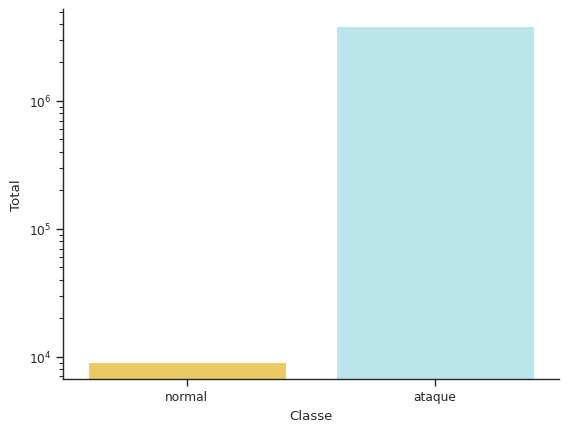

In [21]:
p = sns.countplot(
    x="label", 
    data=pd.concat([
        df.drop("label", axis=1), 
        df["label"].map({0: 'normal', 1: 'ataque'})
    ], axis=1), 
    hue="label", 
    palette=label_colors
)
p.set_yscale("log")
p.set(xlabel="Classe", ylabel="Total")
sns.despine()
plt.show()

<div style="text-align: justify">
    Assim, a partir deste ponto, esta EDA tratará de dois conjuntos de dados diferentes. O primeiro é o conjunto de dados desbalanceado já mencionado. Já o segundo é construído aplicando a técnica Synthetic Minority Over-sampling TEchnique (SMOTE) (Chawla, Bowyer, Hall e Kegelmeyer, 2002) para balancear o número de instâncias por classe, utilizando a estratégia que iguala o número de instâncias gerando instâncias sintéticas para a classe menor.
</div>
<div style="text-align: justify; margin-top: 20px">
    Spelmen e Porkodi (2018) afirmam que o algoritmo SMOTE possui um melhor desempenho do que outros algoritmos do estado da arte em relação ao problema do desbalanceamento.
</div>

> Nitesh V. Chawla, Kevin W. Bowyer, Lawrence O. Hall, and W. Philip Kegelmeyer. 2002. SMOTE: synthetic minority over-sampling technique. J. Artif. Int. Res. 16, 1 (January 2002), 321–357.

> V. S. Spelmen and R. Porkodi, "A Review on Handling Imbalanced Data," 2018 International Conference on Current Trends towards Converging Technologies (ICCTCT), Coimbatore, India, 2018, pp. 1-11, doi: 10.1109/ICCTCT.2018.8551020.

In [22]:
unbalanced = df

In [23]:
sm = SMOTE(sampling_strategy='minority')

balanced = pd.concat([*sm.fit_resample(df.drop("label", axis=1), df["label"])], axis=1)

In [24]:
balanced["label"].value_counts()

label
0    3847857
1    3847857
Name: count, dtype: int64

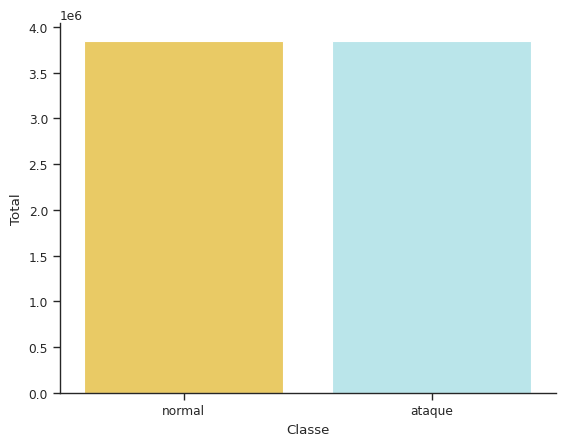

In [25]:
p = sns.countplot(
    x="label", 
    data=pd.concat([
        balanced.drop("label", axis=1), 
        balanced["label"].map({0: 'normal', 1: 'ataque'})
    ], axis=1), 
    hue="label", 
    palette=label_colors
)
p.set(xlabel="Classe", ylabel="Total")
sns.despine()
plt.show()

<div style="text-align: justify">
    Visando compreender melhor a importância de cada <i>feature</i>, analisamos a correlação entre todas elas para ambos os conjuntos de dados, utilizando a matriz que contém o coeficiente de correlação de Spearman.
</div>

> C. Meng, X. S. Jiang, J. Wang and X. M. Wei, "The Complex Network Model for Industrial Data Based on Spearman Correlation Coefficient," 2019 International Conference on Internet of Things (iThings) and IEEE Green Computing and Communications (GreenCom) and IEEE Cyber, Physical and Social Computing (CPSCom) and IEEE Smart Data (SmartData), Atlanta, GA, USA, 2019, pp. 28-33, doi: 10.1109/iThings/GreenCom/CPSCom/SmartData.2019.00028.

<center>
    <div style="text-align: justify;width: 100%;padding: 15px;background-color: #ffecb3;border: 4px solid #e0f7fa">
        O coeficiente de correlação de Spearman é uma medida capaz de avaliar a correlação individual entre duas <i>features</i> (Meng, Jiang, Wang e Wei, 2019).<br><br>
        O coeficiente é expresso como um número no intervalo [-1, 1], de maneira que:
        <ul>
            <li>O coeficiente é igual à -1 se as <i>features</i> possuem a correlação negativa mais forte</li>
            <li>O coeficiente é igual à 1 se as <i>features</i> possuem a correlação positiva mais forte</li>
            <li>O coeficiente é igual à 0 se não há nenhum tipo de correlação</li>
        </ul>
    </div>
</center>

<div style="text-align: justify">
    No trabalho de Guo et al. (2023), é considerado um <i>threshold</i> de 0,9 para seleção de <i>features</i>. Pretendíamos utilizar o mesmo threshold nesta pesquisa, entretanto, após testar, identificamos que, utilizando este threshold, nenhuma <i>feature</i> seria selecionada em ambos os conjuntos de dados. Por isso, estabelecemos um <i>threshold</i> <b>t = 0,6</b>, que é o maior <i>threshold</i> que permite que pelo menos uma <i>feature</i> seja selecionada em cada conjunto de dados. Desta forma, se o valor absoluto do coeficiente de correlação entre uma <i>feature</i> e o rótulo é menor do que <b>t</b>, então esta <i>feature</i> é descartada, devido a sua correlação fraca com o rótulo da classe.
</div>

> G. Guo, X. Pan, H. Liu, F. Li, L. Pei and K. Hu, "An IoT Intrusion Detection System Based on TON IoT Network Dataset," 2023 IEEE 13th Annual Computing and Communication Workshop and Conference (CCWC), Las Vegas, NV, USA, 2023, pp. 0333-0338, doi: 10.1109/CCWC57344.2023.10099144.

In [26]:
threshold = 0.6

#### Dataset Desbalanceado

In [27]:
corr_u = unbalanced.corr(method="spearman")
corr_u

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,sipv4_pos1,sipv4_pos2,sipv4_pos3,sipv4_pos4,sipv6_pos1,sipv6_pos2,sipv6_pos3,sipv6_pos4,sipv6_pos5,sipv6_pos6,sipv6_pos7,sipv6_pos8,dipv4_pos1,dipv4_pos2,dipv4_pos3,dipv4_pos4,dipv6_pos1,dipv6_pos2,dipv6_pos3,dipv6_pos4,dipv6_pos5,dipv6_pos6,dipv6_pos7,dipv6_pos8,e,eF,e&,e*,ed,eg,er,es,eU,ipv6-icmp,tcp,udp,ACC,CON,FIN,INT,NRS,REQ,RST,label
pkSeqID,1.000000,0.999667,0.000859,0.012960,0.278917,-0.379768,0.999621,0.021613,0.085116,0.250152,-0.003067,0.315207,0.186961,0.182603,0.321568,-0.433689,-0.349735,-0.433860,0.159674,0.231908,-0.203080,0.011052,0.010659,0.010584,0.006547,-0.010967,-0.010967,-0.010967,-0.010967,-0.010967,-0.010967,-0.010967,-0.010967,0.017463,0.027368,-0.013722,0.339494,-0.010967,-0.010967,-0.010967,-0.010967,-0.010967,-0.010967,-0.010967,-0.010967,0.764098,-2.784051e-03,-0.006277,-0.019639,-3.050569e-03,-0.063815,-8.810027e-04,-0.767571,0.076469,-0.007495,-0.859482,0.859554,-0.029916,-0.049587,-0.010004,0.862295,-0.007495,-0.619152,-0.399602,0.072432
stime,0.999667,1.000000,0.000852,0.012108,0.278813,-0.379716,0.999955,0.021261,0.084950,0.250074,-0.003241,0.315132,0.187089,0.182515,0.321414,-0.433273,-0.349891,-0.433392,0.159980,0.231812,-0.202881,0.010001,0.009870,0.010056,0.006215,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,0.019073,0.026652,-0.014052,0.339722,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,0.764258,-2.226441e-03,-0.006275,-0.019288,-3.049229e-03,-0.063744,-8.801205e-04,-0.767750,0.076473,-0.006929,-0.859616,0.859683,-0.029922,-0.045679,-0.007878,0.862182,-0.006929,-0.619353,-0.399597,0.068454
sport,0.000859,0.000852,1.000000,-0.046176,-0.009570,-0.011902,0.000459,0.049012,-0.018299,0.002244,-0.002142,-0.001792,0.008068,-0.000504,-0.008466,-0.005572,-0.010703,-0.005432,0.003199,0.000755,-0.008131,0.010796,0.010476,0.010156,0.002937,-0.010619,-0.010619,-0.010619,-0.010619,-0.010619,-0.010619,-0.010619,-0.010619,-0.010088,-0.007305,0.008358,-0.000982,-0.010619,-0.010619,-0.010619,-0.010619,-0.010619,-0.010619,-0.010619,-0.010619,0.010128,3.395948e-04,-0.005855,-0.006451,1.354784e-03,-0.012323,3.722987e-05,-0.008731,-0.000842,-0.008218,-0.000928,0.001007,-0.004036,-0.007541,0.004671,0.000568,-0.008218,0.004286,-0.006387,0.001640
dport,0.012960,0.012108,-0.046176,1.000000,0.040950,0.038328,0.012291,0.006146,0.041755,0.022591,0.036748,0.027253,-0.002874,0.029376,0.037045,0.028935,0.049668,0.023682,-0.013588,0.015225,0.063056,-0.003372,0.000818,0.005006,-0.007754,-0.001546,-0.001546,-0.001546,-0.001546,-0.001544,-0.001544,-0.001547,-0.001546,0.068991,0.138247,-0.197053,0.006417,-0.001546,-0.001546,-0.001546,-0.001546,-0.001546,-0.001546,-0.001546,-0.001543,-0.037367,-2.967462e-02,0.038872,0.021094,3.247806e-02,0.014134,9.375429e-03,0.035269,-0.000568,-0.088167,0.041370,-0.040528,0.000063,-0.315112,0.107326,-0.016892,-0.088167,0.003236,0.056339,0.430106
pkts,0.278917,0.278813,-0.009570,0.040950,1.000000,0.619931,0.281253,-0.194557,0.571194,0.377739,0.501470,0.767270,0.068982,0.436605,0.989503,0.063946,0.636186,0.063460,0.544424,0.553299,0.129906,0.010592,0.010781,0.011002,-0.155719,-0.010991,-0.010991,-0.010991,-0.010991,-0.010991,-0.010991,-0.010991,-0.010991,0.002943,0.018250,-0.006204,-0.328163,-0.010991,-0.010991,-0.010991,-0.010991,-0.010991,-0.010991,-0.010991,-0.010991,0.316733,-1.563405e-03,0.006629,0.016470,2.842957e-03,0.021571,8.849333e-04,-0.323834,0.037180,-0.007849,-0.473623,0.473698,-0.000056,-0.004394,0.009383,0.475422,-0.007849,-0.518793,0.050306,0.021097
bytes,-0.379768,-0.379716,-0.011902,0.038328,0.619931,1.000000,-0.376518,-0.269959,0.556595,0.114640,0.473932,0.417336,-0.120698,0.268451,0.593025,0.331251,0.992744,0.330833,0.236372,0.214584,0.228445,0.010250,0.010418,0.010596,-0.211397,-0.010587,-0.010587,-0.010587,-0.010587,-0.010587,-0.010587,-0.010588,-0.010587,0.007236,0.008653,-0.009808,

In [28]:
strong_features_u = corr_u[abs(corr_u["label"]) >= threshold]["label"]
strong_features_u.sort_values(ascending=False)

label    1.000000
CON     -0.729397
Name: label, dtype: float64

#### Dataset Balanceado

In [29]:
corr_b = balanced.corr(method="spearman")
corr_b

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,sipv4_pos1,sipv4_pos2,sipv4_pos3,sipv4_pos4,sipv6_pos1,sipv6_pos2,sipv6_pos3,sipv6_pos4,sipv6_pos5,sipv6_pos6,sipv6_pos7,sipv6_pos8,dipv4_pos1,dipv4_pos2,dipv4_pos3,dipv4_pos4,dipv6_pos1,dipv6_pos2,dipv6_pos3,dipv6_pos4,dipv6_pos5,dipv6_pos6,dipv6_pos7,dipv6_pos8,e,eF,e&,e*,ed,eg,er,es,eU,ipv6-icmp,tcp,udp,ACC,CON,FIN,INT,NRS,REQ,RST,label
pkSeqID,1.000000,0.963878,-0.159597,0.451025,0.465964,0.189694,0.963610,0.502607,0.442589,0.402643,0.491990,0.402495,0.044415,0.392441,0.523279,-0.267607,0.396834,-0.441697,-0.260464,0.342775,-0.042538,0.106295,0.102196,0.106053,0.527229,-0.108505,-0.108290,-0.108290,-0.108290,-0.108426,-0.108470,-0.108449,-0.108388,0.199205,0.344495,-0.113857,-0.449411,-0.108505,-0.108290,-0.108290,-0.108290,-0.108290,-0.108290,-0.108290,-0.108469,-0.142881,-0.033069,-0.070260,0.034988,-0.039977,0.004893,-0.015718,0.140352,0.022382,-0.083719,0.124372,-0.118438,-0.001222,-0.455407,-0.100355,0.143626,-0.083719,0.153221,0.019060,0.748146
stime,0.963878,1.000000,-0.171439,0.466641,0.454746,0.215150,0.999912,0.446714,0.418638,0.409056,0.472804,0.409384,0.071131,0.398751,0.501552,-0.213447,0.375420,-0.386955,-0.218826,0.315424,-0.025209,0.085092,0.084438,0.089658,0.472386,-0.089240,-0.089015,-0.089015,-0.089015,-0.089128,-0.089187,-0.089193,-0.089111,0.234727,0.339019,-0.129549,-0.424440,-0.089240,-0.089015,-0.089015,-0.089015,-0.089015,-0.089015,-0.089015,-0.089188,-0.121551,-0.020430,-0.058370,0.036986,-0.034407,0.008680,-0.011365,0.118129,0.030678,-0.069566,0.113858,-0.103797,-0.001823,-0.406971,-0.065835,0.106791,-0.069566,0.132725,0.010307,0.707175
sport,-0.159597,-0.171439,1.000000,-0.259492,-0.399320,-0.422444,-0.172718,0.177025,-0.319252,-0.384083,-0.249967,-0.386028,-0.254799,-0.387015,-0.409824,-0.023680,-0.422645,0.051837,-0.166826,-0.323422,-0.147076,0.130098,0.127476,0.122613,0.118658,-0.128557,-0.128503,-0.128503,-0.128503,-0.128504,-0.128521,-0.128582,-0.128547,-0.152539,-0.133170,0.095989,0.265348,-0.128557,-0.128503,-0.128503,-0.128503,-0.128503,-0.128503,-0.128503,-0.128484,0.015644,0.002562,-0.091908,-0.182567,0.030348,-0.012647,-0.001268,0.003204,0.010727,-0.111458,-0.269524,0.117412,-0.002318,-0.126480,0.064673,0.086307,-0.111458,0.009817,0.004164,0.016084
dport,0.451025,0.466641,-0.259492,1.000000,0.464581,0.373531,0.467427,0.261711,0.433638,0.373910,0.458234,0.400513,0.101634,0.388350,0.506815,0.064457,0.524998,-0.113470,-0.140132,0.317633,0.349959,-0.079514,-0.072339,-0.062909,0.250245,0.071047,0.071169,0.071169,0.071169,0.071393,0.071341,0.070754,0.071020,0.114935,0.139231,-0.208120,-0.265909,0.071047,0.071169,0.071169,0.071169,0.071169,0.071169,0.071169,0.071698,-0.244520,-0.033188,0.086056,0.135175,0.051827,0.112835,0.019259,0.227004,-0.006476,0.015870,0.403621,-0.254000,0.006079,-0.243547,0.150593,-0.063506,0.015870,0.207774,0.112243,0.420642
pkts,0.465964,0.454746,-0.399320,0.464581,1.000000,0.823436,0.456908,-0.067292,0.819865,0.734308,0.747156,0.832358,0.338350,0.771079,0.964776,0.123509,0.896269,-0.055731,0.286216,0.742119,0.394668,0.130907,0.132637,0.137984,0.052707,-0.138868,-0.138608,-0.138608,-0.138608,-0.138805,-0.138846,-0.138799,-0.138740,0.075830,0.281511,-0.043945,-0.467077,-0.138868,-0.138608,-0.138608,-0.138608,-0.138608,-0.138608,-0.138608,-0.138839,-0.072199,-0.025330,0.116457,0.249035,0.040681,0.085144,0.015004,0.041839,0.004786,-0.109056,0.348977,-0.126115,0.005031,0.020436,0.102494,-0.012027,-0.109056,-0.105093,0.102867,0.216985
bytes,0.189694,0.215150,-0.422444,0.373531,0.823436,1.000000,0.217381,-0.186108,0.662373,0.648222,0.619975,0.736129,0.357215,0.697880,0.739013,0.353355,0.806542,0.227722,0.370704,0.484943,0.416222,0.107761,0.111119,0.116498,-0.145293,-0.116144,-0.115838,-0.115838,-0.115838,-0.115956,-0.116011,-0.116177,-0.116014,0.130515,0.180421,-0.098146,-0.326793,-0.116144,-0.115838,-0.115838,-0.115838,-0.115838,-0.115838,-0.115838,-0.115

In [30]:
strong_features_b = corr_b[abs(corr_b["label"]) >= threshold]["label"]
strong_features_b.sort_values(ascending=False)

label         1.000000
sipv4_pos4    0.752834
pkSeqID       0.748146
stime         0.707175
ltime         0.706314
seq           0.681327
CON          -0.710560
Name: label, dtype: float64

---

<div style="text-align: justify">
    Após a avaliação do coeficiente de correlação, é possível estabelecer as <i>features</i> que melhor descrevem os dados. Assim, para ambos os conjuntos de dados passamos, a partir de agora, a considerar apenas estas <i>features</i>, além do rótulo.
</div>

In [31]:
unbalanced = unbalanced[["CON", "label"]]

In [32]:
balanced = balanced[["pkSeqID", "stime", "ltime", "seq", "sipv4_pos4", "CON", "label"]]

Como o conjunto de dados desbalanceado agora possui somente uma _feature_, não é necessário realizar procedimentos de seleção adicionais.

Já para o conjunto de dados balanceado, o mapa de calor das correlações entre as _features_ atuais é apresentado abaixo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695714 entries, 0 to 7695713
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   pkSeqID     int64  
 1   stime       float64
 2   ltime       float64
 3   seq         int64  
 4   sipv4_pos4  int64  
 5   CON         bool   
 6   label       int64  
dtypes: bool(1), float64(2), int64(4)
memory usage: 359.6 MB


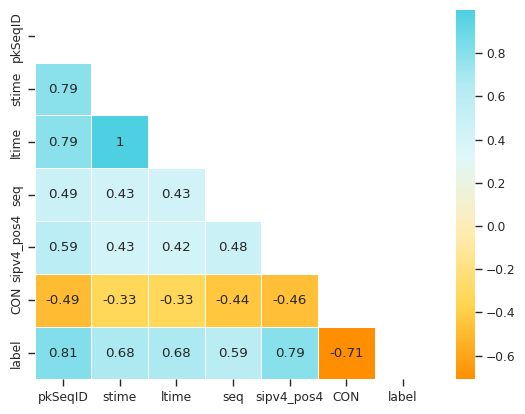

In [33]:
balanced.info()

corr_b = balanced.corr()
mask = np.triu(corr_b)

sns.heatmap(corr_b, annot=True, linewidths=.5, cmap=cmap, mask=mask)
plt.show()

<div style="text-align: justify">
    Como destacado no mapa, as <i>features</i> <b>stime</b> e <b>ltime</b> possuem a maior correlação positiva possível. Entendemos então que elas trazem o mesmo conhecimento em duplicidade e, por isso, removemos uma delas (escolhemos remover de forma arbitrária a <i>feature</i> <b>ltime</b>). Da mesma forma, a <i>feature</i> <b>pkSeqID</b> também é removida, pois possui uma correlação maior que o <i>threshold</i> com <b>stime</b> e <b>ltime</b>.<br><br>
</div>

In [34]:
balanced = balanced.drop(["ltime", "pkSeqID"], axis=1)

balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695714 entries, 0 to 7695713
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   stime       float64
 1   seq         int64  
 2   sipv4_pos4  int64  
 3   CON         bool   
 4   label       int64  
dtypes: bool(1), float64(1), int64(3)
memory usage: 242.2 MB


#### Gráficos de Dispersão

<div style="text-align: justify">
    Na sequência, os gráficos de dispersão que descrevem a correlação entre as <i>features</i> restantes e o rótulo são apresentados para ambos os conjuntos de dados. Os gráficos de dispersão auxiliam na visualização da função que descreve os coeficientes de correção previamente demonstrados.
</div>

1. Desbalanceado

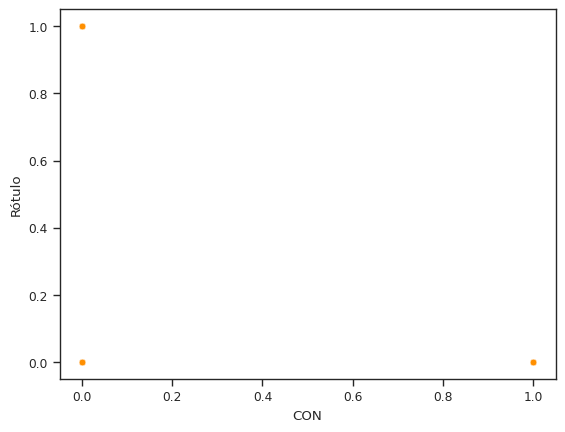

In [35]:
sns.set_palette(scatterplot)
p = sns.scatterplot(data=unbalanced, x="CON", y="label")
p.set(ylabel="Rótulo")
plt.show()

2. Balanceado

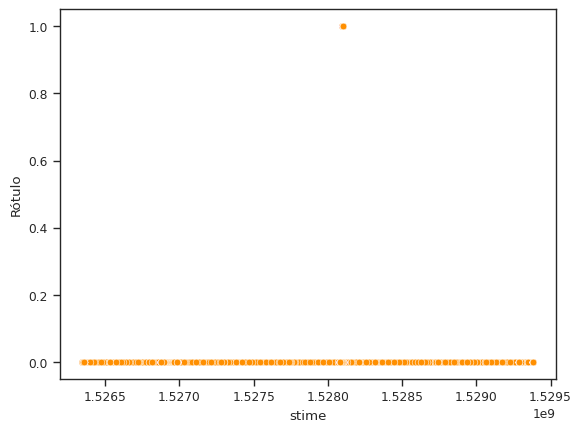

In [36]:
p = sns.scatterplot(data=balanced, x="stime", y="label")
p.set(ylabel="Rótulo")
plt.show()

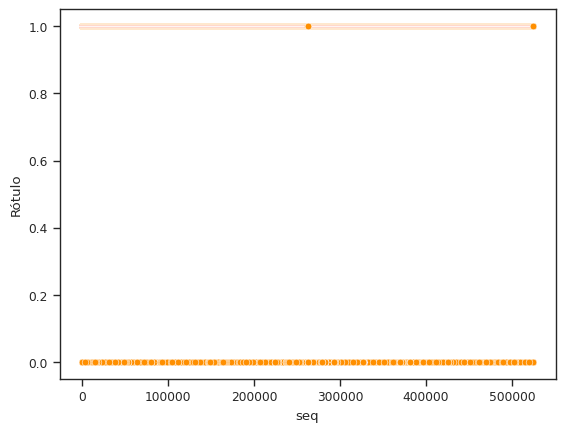

In [37]:
p = sns.scatterplot(data=balanced, x="seq", y="label")
p.set(ylabel="Rótulo")
plt.show()

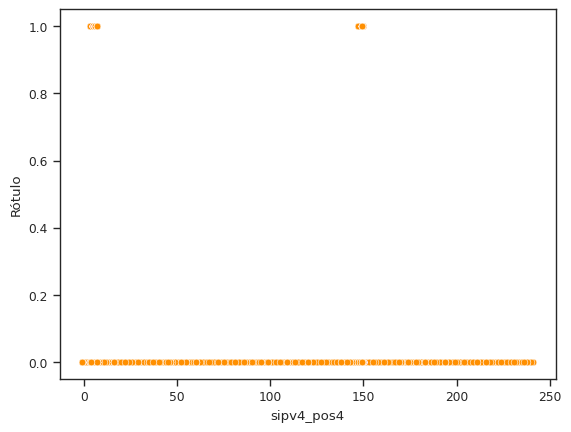

In [38]:
p = sns.scatterplot(data=balanced, x="sipv4_pos4", y="label")
p.set(ylabel="Rótulo")
plt.show()

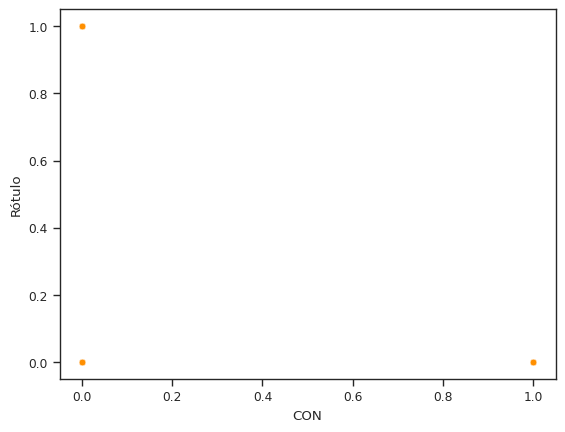

In [39]:
p = sns.scatterplot(data=balanced, x="CON", y="label")
p.set(ylabel="Rótulo")
plt.show()

---

#### Árvores de Decisão

<div style="text-align: justify">
    Considerando que esta pesquisa explora métodos <i>ensemble</i> cujo modelo base é a Árvore de Hoeffding, a avaliação de árvores de decisão, construídas utilizando diferentes combinações das quatro <i>features</i> restantes do conjunto de dados balanceado, para classificação dos dados entre tráfego normal e tráfego de ataque é apresentada na sequência. O objetivo é identificar a combinação que apresenta as melhores métricas (acurácia, precisão e <i>recall</i>), para que então esta EDA possa passar a considerar apenas a combinação identificada.
</div>

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from prettytable.colortable import PrettyTable

In [41]:
table = PrettyTable(["Features", "Acurácia (%)", "Precisão (%)", "Recall (%)"])

In [42]:
# Combination of 1
stime = balanced[["stime", "label"]]
seq = balanced[["seq", "label"]]
sipv4pos4 = balanced[["sipv4_pos4", "label"]]
con = balanced[["CON", "label"]]
# Combination of 2
stime_seq = balanced[["stime", "seq", "label"]]
stime_sipv4pos4 = balanced[["stime", "sipv4_pos4", "label"]]
stime_con = balanced[["stime", "CON", "label"]]
seq_sipv4pos4 = balanced[["seq", "sipv4_pos4", "label"]]
seq_con = balanced[["seq", "CON", "label"]]
sipv4pos4_con = balanced[["sipv4_pos4", "CON", "label"]]
# Combination of 3
stime_seq_sipv4pos4 = balanced[["stime", "seq", "sipv4_pos4", "label"]]
stime_seq_con = balanced[["stime", "seq", "CON", "label"]]
stime_sipv4pos4_con = balanced[["stime", "sipv4_pos4", "CON", "label"]]
seq_sipv4pos4_con = balanced[["seq", "sipv4_pos4", "CON", "label"]]
# Combination of 4
stime_seq_sipv4pos4_con = balanced[["stime", "seq", "sipv4_pos4", "CON", "label"]]

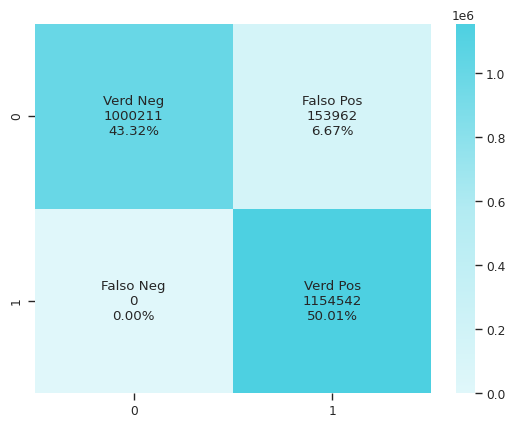

Acurácia: 93.33
Precisão: 88.23
Recall: 100.0


In [43]:
X = stime.drop(["label"], axis = 1)
y = stime[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["stime",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

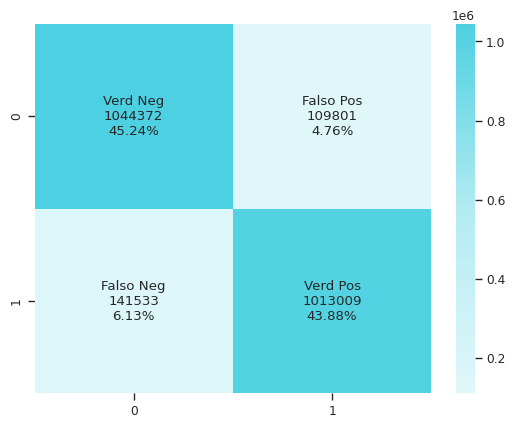

Acurácia: 89.11
Precisão: 90.22
Recall: 87.74


In [44]:
X = seq.drop(["label"], axis = 1)
y = seq[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["seq",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

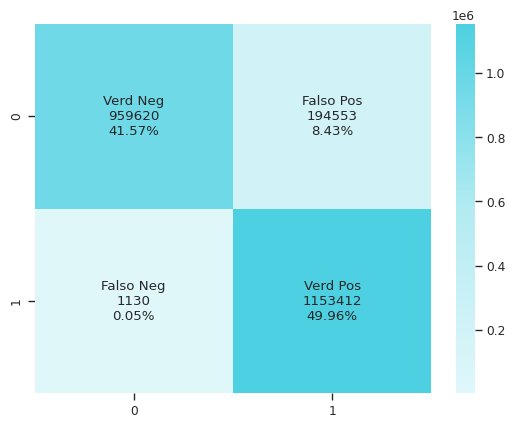

Acurácia: 91.52
Precisão: 85.57
Recall: 99.9


In [45]:
X = sipv4pos4.drop(["label"], axis = 1)
y = sipv4pos4[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["sipv4pos4",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

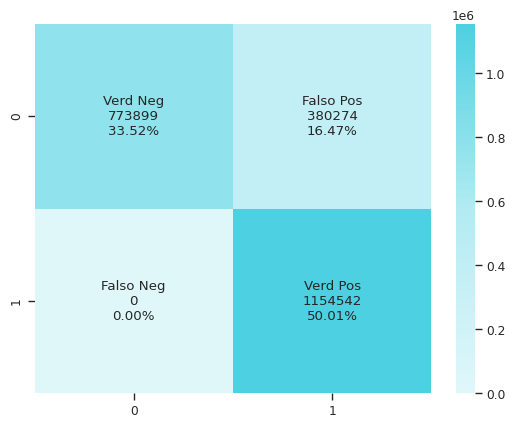

Acurácia: 83.53
Precisão: 75.22
Recall: 100.0


In [46]:
X = con.drop(["label"], axis = 1)
y = con[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["con",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

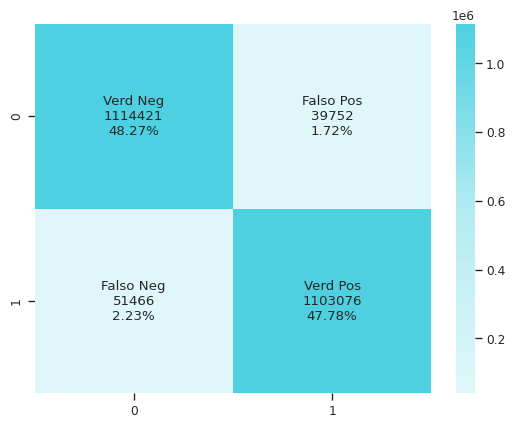

Acurácia: 96.05
Precisão: 96.52
Recall: 95.54


In [47]:
X = stime_seq.drop(["label"], axis = 1)
y = stime_seq[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["stime_seq",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

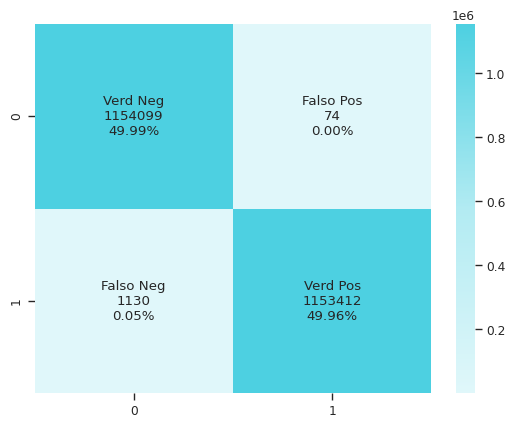

Acurácia: 99.95
Precisão: 99.99
Recall: 99.9


In [48]:
X = stime_sipv4pos4.drop(["label"], axis = 1)
y = stime_sipv4pos4[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["stime_sipv4pos4",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

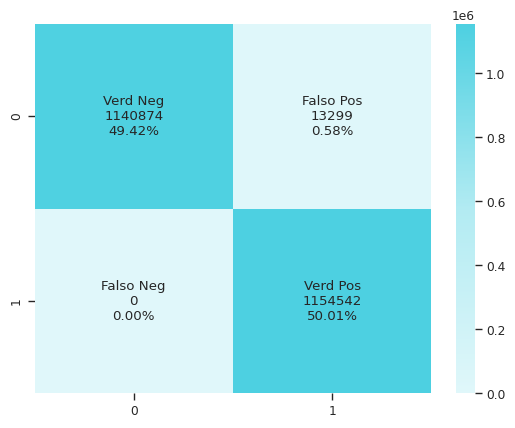

Acurácia: 99.42
Precisão: 98.86
Recall: 100.0


In [49]:
X = stime_con.drop(["label"], axis = 1)
y = stime_con[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["stime_con",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

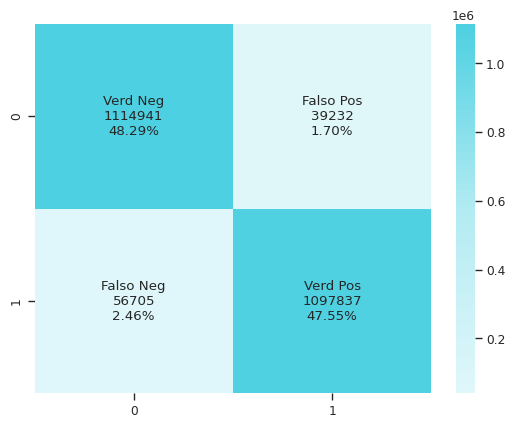

Acurácia: 95.84
Precisão: 96.55
Recall: 95.09


In [50]:
X = seq_sipv4pos4.drop(["label"], axis = 1)
y = seq_sipv4pos4[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["seq_sipv4pos4",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

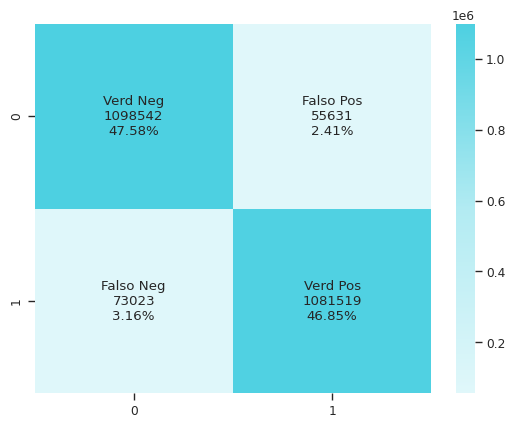

Acurácia: 94.43
Precisão: 95.11
Recall: 93.68


In [51]:
X = seq_con.drop(["label"], axis = 1)
y = seq_con[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["seq_con",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

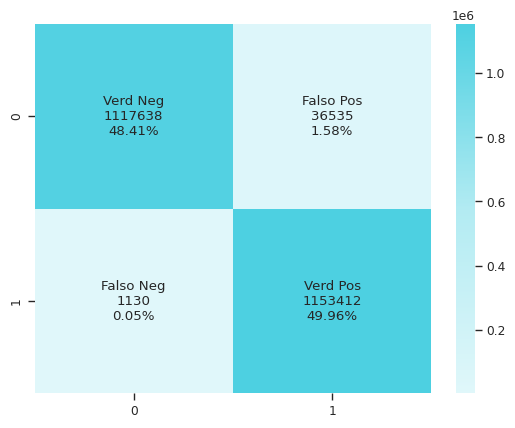

Acurácia: 98.37
Precisão: 96.93
Recall: 99.9


In [52]:
X = sipv4pos4_con.drop(["label"], axis = 1)
y = sipv4pos4_con[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["\033[1m"+"sipv4pos4_con"+"\u001b[0m",
               "\033[1m"+f"{accuracy:.2f}"+"\u001b[0m",
               "\033[1m"+f"{precision:.2f}"+"\u001b[0m",
               "\033[1m"+f"{recall:.2f}"+"\u001b[0m"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

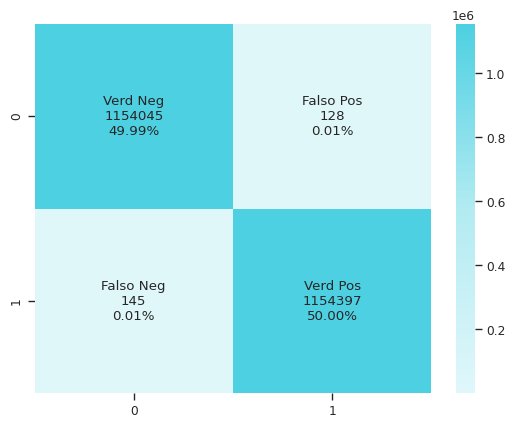

Acurácia: 99.99
Precisão: 99.99
Recall: 99.99


In [53]:
X = stime_seq_sipv4pos4.drop(["label"], axis = 1)
y = stime_seq_sipv4pos4[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["stime_seq_sipv4pos4",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

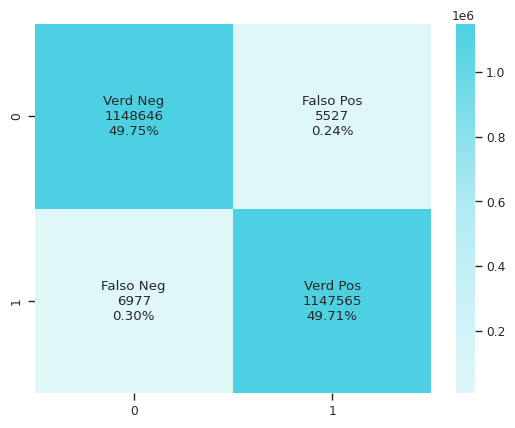

Acurácia: 99.46
Precisão: 99.52
Recall: 99.4


In [54]:
X = stime_seq_con.drop(["label"], axis = 1)
y = stime_seq_con[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["stime_seq_con",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

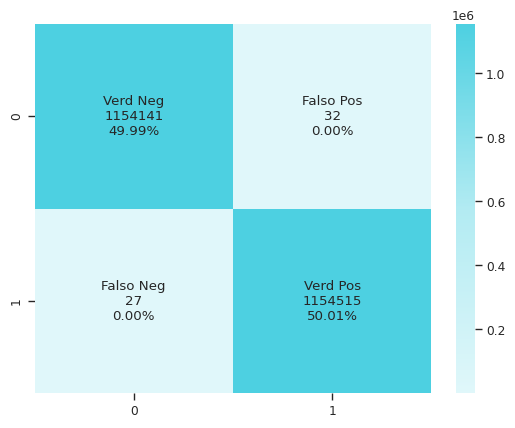

Acurácia: 100.0
Precisão: 100.0
Recall: 100.0


In [55]:
X = stime_sipv4pos4_con.drop(["label"], axis = 1)
y = stime_sipv4pos4_con[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["stime_sipv4pos4_con",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

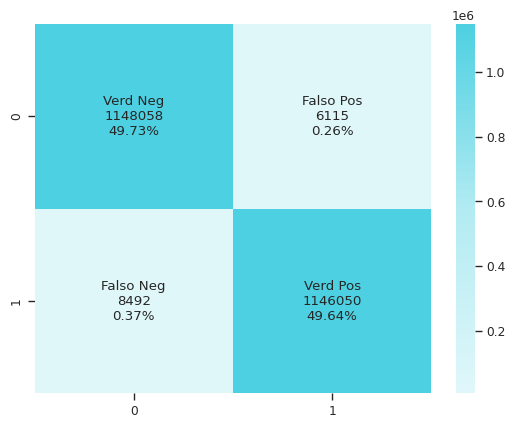

Acurácia: 99.37
Precisão: 99.47
Recall: 99.26


In [56]:
X = seq_sipv4pos4_con.drop(["label"], axis = 1)
y = seq_sipv4pos4_con[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["seq_sipv4pos4_con",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

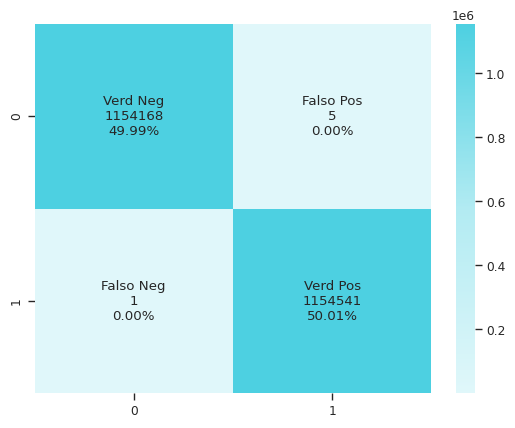

Acurácia: 100.0
Precisão: 100.0
Recall: 100.0


In [57]:
X = stime_seq_sipv4pos4_con.drop(["label"], axis = 1)
y = stime_seq_sipv4pos4_con[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ["Verd Neg", "Falso Pos", "Falso Neg", "Verd Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt="", cmap=cmap_cm)
plt.show()

accuracy = round((metrics.accuracy_score(y_test, y_pred) * 100), 2)
precision = round((metrics.precision_score(y_test, y_pred) * 100), 2)
recall = round((metrics.recall_score(y_test, y_pred) * 100), 2)

table.add_row(["stime_seq_sipv4pos4_con",
               f"{accuracy:.2f}",
               f"{precision:.2f}",
               f"{recall:.2f}"])

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

In [58]:
table.align = "r"
table.align["Features"] = "l"
print(table)

+-------------------------+--------------+--------------+------------+
| Features                | Acurácia (%) | Precisão (%) | Recall (%) |
+-------------------------+--------------+--------------+------------+
| stime                   |        93.33 |        88.23 |     100.00 |
| seq                     |        89.11 |        90.22 |      87.74 |
| sipv4pos4               |        91.52 |        85.57 |      99.90 |
| con                     |        83.53 |        75.22 |     100.00 |
| stime_seq               |        96.05 |        96.52 |      95.54 |
| stime_sipv4pos4         |        99.95 |        99.99 |      99.90 |
| stime_con               |        99.42 |        98.86 |     100.00 |
| seq_sipv4pos4           |        95.84 |        96.55 |      95.09 |
| seq_con                 |        94.43 |        95.11 |      93.68 |
| sipv4pos4_con           |        98.37 |        96.93 |      99.90 |
| stime_seq_sipv4pos4     |        99.99 |        99.99 |      99.99 |
| stim

<div style="text-align: justify">
    Considerando os resultados apresentados na tabela acima, o seguinte é inferido pelos autores:
    <ul>
        <li>Preterimos a utilização de combinações que possuam um resultado de 100% em qualquer uma das métricas, pois entendemos que é possível que eles estejam com sobreajuste e terão um desempenho pior na predição de novas instâncias</li>
        <li>Preferimos utilizar uma combinação que inclua o maior número de <i>features</i> possível, para maximizar o volume de informações sobre os dados</li>
        <li>Como a combinação das <i>features</i> stime e sipv4_pos4 apresenta métricas muito próximas de 100%, para que seja possível atender às preferências já mencionadas, escolhemos a combinação das <i>features</i> <b>sipv4_pos4</b> e <b>CON</b>, que apresenta resultados significativos para as métricas avaliadas</li>
    </ul>
</div>

Desta forma, a partir de agora, esta EDA considera que o conjunto balanceado de dados é constituído pelas <i>features</i> **sipv4_pos4** e **CON**, além do rótulo.

In [59]:
balanced = balanced[["sipv4_pos4", "CON", "label"]]

<center>
    <div style="text-align: justify;width: 100%;padding: 15px;background-color: #ffecb3;border: 4px solid #e0f7fa">
        A <i>feature</i> CON está presente na versão final de ambos os conjuntos de dados, o quê para os autores reforça sua importância para a representação do conhecimento inerente ao conjunto de dados.<br><br>
        <a href="https://www.systutorials.com/docs/linux/man/1-ra/">Quando esta <i>feature</i> é igual à 1, a transação de rede está ativa e em andamento.</a>
    </div>
</center>

---

### Conclusões

<div style="text-align: justify">
    A Análise Inicial juntamente com a Análise Exploratória do conjunto de dados BoT-IoT aqui apresentadas levaram à obtenção de dois conjuntos de dados diferentes. O primeiro deles é o <b>conjunto de dados desbalanceado</b>, que contém apenas instâncias originais do conjunto de dados BoT-IoT, possui significativamente mais instâncias de ataque do que instâncias normais e consiste apenas na <i>feature</i> <b>CON</b> (resultado da avaliação do coeficiente de correlação). O segundo deles é o <b>conjunto de dados balanceado</b>, que contém instâncias originais do conjunto de dados BoT-IoT mais instâncias sintéticas geradas pela técnica SMOTE, possui uma distribuição balanceada de instâncias por classe e é constituído pelas <i>features</i> <b>sipv4_pos4</b> e <b>CON</b> (resultado de todo o processo de seleção de <i>features</i>).<br><br>
    As análises realizadas buscaram entender as informações contidas no conjunto de dados BoT-IoT e fornecer meios para filtrar e ajustar os dados de forma a atender as características demandadas pelos métodos <i>ensemble</i> que serão utilizados por esta pesquisa para o estudo da classificação de fluxos contínuos de dados.<br><br>
    Através do resultado desta EDA, um processamento avançado será realizado no conjunto de dados original para geração dos arquivos de dados finais que serão utilizados nos experimentos deste trabalho.
</div>

---